# 機械学習帳 確認問題(7.4)

[機械学習帳のニューラルネットワーク(1)の確認問題(7.4)](https://chokkan.github.io/mlnote/classification/03nn.html#id21)を解きます。

## 講義内容の復習

![chapter7-1.svg](./images/chapter7/chapter7-1.svg)

![chapter7-2.svg](./images/chapter7/chapter7-2.svg)

## 0. 関数準備

確認問題に使用する関数$G$を準備する。

In [1]:
def G(x):
    if -5 <= x < 4:
        i = int(x + 5)
        return [-1, 0, 1, 0, -1, 1, 0, 1, -1][i]
    else:
        return 0

[np.vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html)は関数Gの引数にnumpy.arrayを渡し、その計算結果をnumpy.arrayでまとめて受け取れるようにするための「おまじない」である。

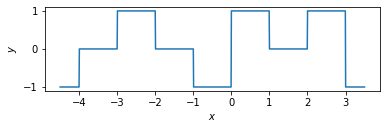

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot(ax, f):
    X = np.linspace(-4.5, 3.5, 1000)
    Y = f(X)
    
    ax.plot(X, Y, '-')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_aspect('equal')

fig, ax = plt.subplots()
g = np.vectorize(G)
plot(ax, g)
plt.show()

1層の隠れ層を持つニューラルネットワーク

\begin{align*}
F(x) = \sum_{i=1}^M v_i \sigma(w_i x + b_i) \\
\end{align*}

を考える。ここで、$M$は隠れ層のユニット数、$\pmb{v}, \pmb{w}, \pmb{b} \in \mathbb{R}^M$はモデルのパラメータである。$M$の値を適当に決定し、関数`G`の出力を再現するパラメータ$\pmb{v}, \pmb{w}, \pmb{b}$を求め、このニューラルネットワークの出力$F(x)$をプロットせよ。

## 解答例

まず、Fを定義します。

In [3]:
def F(x, v, w, b):
    def sigmoid(x):  
        return np.exp(-np.logaddexp(0, -x))
    return np.dot(sigmoid(np.outer(x, w) + b), v)

実装を確認します。

<AxesSubplot:>

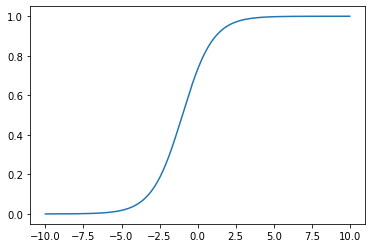

In [4]:
import pandas as pd


X = np.linspace(-10, 10, 1000)
pd.Series(F(X, np.array([1]), np.array([1]), np.array([1])), index=X).plot.line()

`G`を再現する`F`のパラメーターを求めていきます。まず、$w$を固定します。`G`は-1, 0, 1の整数値を取ります。`F`の値に近づけるには、`sigmoid`関数に渡す値を大きくして値を1/-1に近くする必要があります。

In [5]:
w = 1e+6

$b$: `G`の値が変化する`x`をもとに、矩形の変化する位置を設定します。

In [6]:
B = [5, 4, 3, 2, 1, 0, -1, -2, -3]
B = np.array(B) * w

$v$: `G`の値の変化方向をもとに、矩形の変化方向と大きさを設定します。

In [7]:
V = [-1, 1, 1, -1, -1, 2, -1, 1, -2]

In [8]:
X = np.linspace(-4.5, 3.5, 1000)

<AxesSubplot:>

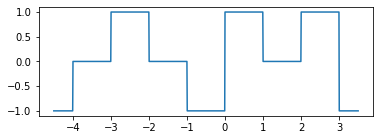

In [9]:
pd.Series(F(X, V, w, B), index=X).plot.line(figsize=(6, 2))

`G`の値が再現できていることを確認します。

In [10]:
np.testing.assert_allclose(F(X, V, w, B), [G(x) for x in X])